<a href="https://colab.research.google.com/github/eddercipras/maiz/blob/main/Evaluacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import plotly.express as px
import pickle
import os

In [36]:
path_logs = "/content/drive/MyDrive/proyecto/logs"
logs = os.listdir(path_logs)
full_logs = [os.path.join(path_logs, log) for log in logs]

In [37]:
data_logs = []
for full_log, log in zip(full_logs, logs):
  with open(full_log, "rb") as file_pi:
    history = pd.DataFrame(pickle.load(file_pi))
    history["model"] = log
    data_logs.append(history)

data_logs = pd.concat(data_logs)
data_logs

,loss,accuracy,val_loss,val_accuracy,lr,model
0,13.211640,0.780364,12.345143,0.425329,0.00100,EfficienteNetV2BO-20221221-181519
1,10.472252,0.849597,9.077770,0.749104,0.00100,EfficienteNetV2BO-20221221-181519
2,8.266129,0.885407,7.335583,0.869773,0.00100,EfficienteNetV2BO-20221221-181519
3,6.682577,0.908684,6.026490,0.870968,0.00100,EfficienteNetV2BO-20221221-181519
4,5.450991,0.916741,4.930354,0.891278,0.00100,EfficienteNetV2BO-20221221-181519
...,...,...,...,...,...,...
45,0.244739,0.995524,0.334195,0.960573,0.00001,ResNet50-20221223-161945
46,0.240557,0.996121,0.333663,0.964158,0.00001,ResNet50-20221223-161945
47,0.246438,0.995524,0.335128,0.961768,0.00001,ResNet50-20221223-161945
48,0.237885,0.997314,0.337103,0.964158,0.00001,ResNet50-20221223-161945


In [63]:
fig = px.line(data_logs, x=data_logs.index, y=["val_loss"], color="model", template="plotly_white")
fig.show()

In [45]:
fig = px.line(data_logs, x=data_logs.index, y=["val_accuracy"], color="model", template="plotly_white")
fig.show()

In [53]:
import keras
import tensorflow

In [55]:
model = keras.models.load_model("/content/drive/MyDrive/proyecto/models/DenseNet201.16-0.97.h5")

Populating the interactive namespace from numpy and matplotlib


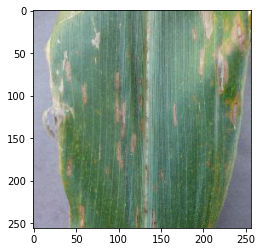

1/1 [==============================] - 0s 267ms/step
This image (/content/drive/MyDrive/proyecto/data/unzipped/data/Gray_Leaf_Spot/Corn_Gray_Spot (102).JPG) is:
 0.01 percent Blight
 0.00 percent Common_Rust
 0.99 Gray_Leaf_Spot
 0.00 Healthy


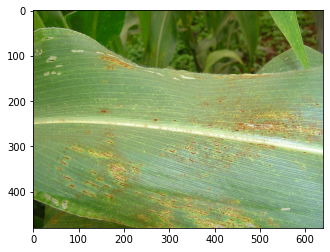

1/1 [==============================] - 0s 260ms/step
This image (/content/drive/MyDrive/proyecto/data/unzipped/data/Common_Rust/Corn_Common_Rust (10).jpg) is:
 0.00 percent Blight
 1.00 percent Common_Rust
 0.00 Gray_Leaf_Spot
 0.00 Healthy


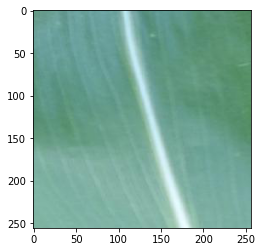

1/1 [==============================] - 0s 279ms/step
This image (/content/drive/MyDrive/proyecto/data/unzipped/data/Healthy/Corn_Health (1000).jpg) is:
 0.01 percent Blight
 0.01 percent Common_Rust
 0.01 Gray_Leaf_Spot
 0.97 Healthy


In [70]:
%pylab inline
images = ["/content/drive/MyDrive/proyecto/data/unzipped/data/Gray_Leaf_Spot/Corn_Gray_Spot (102).JPG", 
          "/content/drive/MyDrive/proyecto/data/unzipped/data/Common_Rust/Corn_Common_Rust (10).jpg", 
          "/content/drive/MyDrive/proyecto/data/unzipped/data/Healthy/Corn_Health (1000).jpg"]
for image in images:
  img_path = image
  import matplotlib.pyplot as plt
  import matplotlib.image as mpimg
  img = mpimg.imread(img_path)
  imgplot = plt.imshow(img)
  plt.show();
  img = tensorflow.keras.utils.load_img(img_path, target_size=(240, 240))
  img_array = tensorflow.keras.utils.img_to_array(img)
  img_array = tensorflow.expand_dims(img_array, 0)  # Create batch axis

  predictions = model.predict(img_array)
  score = predictions[0]
  print(
      f"This image ({image}) is:\n {score[0]:.2f} percent Blight\n {score[1]:.2f} percent Common_Rust\n {score[2]:.2f} Gray_Leaf_Spot\n {score[3]:.2f} Healthy")


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(240,240))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")